In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Merging and Joining DataFrames for Enhanced Visualizations

In [36]:
additional_info = pd.DataFrame(
    {"day" : ['Thur','Fri','Sat','Sun'],
    'holiday' : [False,False,True,True]}
)

In [37]:
additional_info

,day,holiday
0,Thur,False
1,Fri,False
2,Sat,True
3,Sun,True


In [38]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [39]:
merged_tips = pd.merge(tips,additional_info,on='day',how='left')

In [40]:
merged_tips.head()

,total_bill,tip,sex,smoker,day,time,size,holiday
0,16.99,1.01,Female,No,Sun,Dinner,2,True
1,10.34,1.66,Male,No,Sun,Dinner,3,True
2,21.01,3.50,Male,No,Sun,Dinner,3,True
3,23.68,3.31,Male,No,Sun,Dinner,2,True
4,24.59,3.61,Female,No,Sun,Dinner,4,True


Text(0.5, 1.0, 'Average Total Bill per Day by Holiday Status')

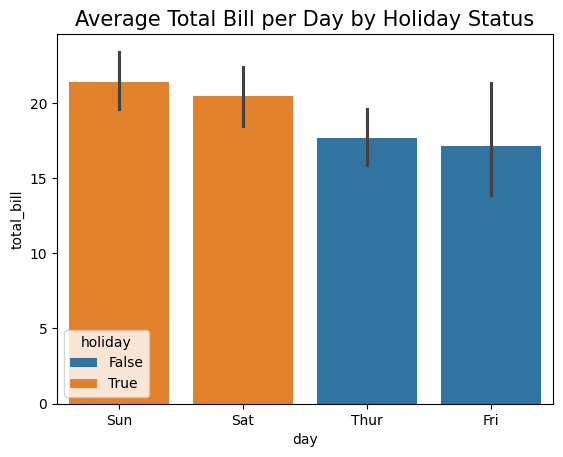

In [41]:
sns.barplot(x='day',y='total_bill',hue='holiday',data=merged_tips)
plt.title("Average Total Bill per Day by Holiday Status",fontsize=15)

In [42]:
# Handling Missing Data Before Visualization

In [43]:
tips.loc[5:10,'tip'] = np.nan

In [44]:
tips.isnull().sum()

total_bill    0
tip           6
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

<Axes: >

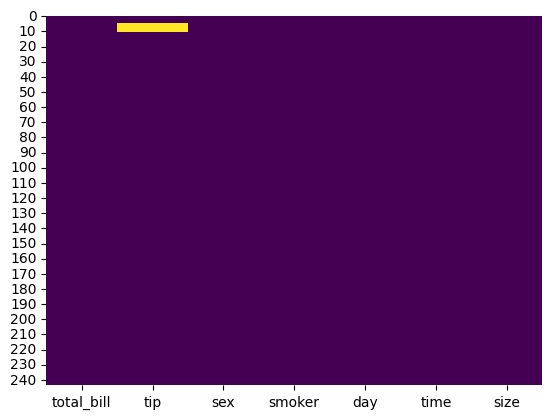

In [45]:
sns.heatmap(tips.isnull(),cbar=False,cmap='viridis')

In [46]:
# # Option 1: Remove rows with missing values
cleaned_tips = tips.dropna()
cleaned_tips.isnull().sum()

In [51]:
# Option 2: Impute missing values (e.g., fill with median)
tips['tip'] = tips['tip'].fillna(tips['tip'].median())
tips[0:15]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,2.90,Male,No,Sun,Dinner,4
6,8.77,2.90,Male,No,Sun,Dinner,2
7,26.88,2.90,Male,No,Sun,Dinner,4
8,15.04,2.90,Male,No,Sun,Dinner,2
9,14.78,2.90,Male,No,Sun,Dinner,2


Text(0.5, 1.0, 'Box Plot of Total Bill by Day (Cleaned Data)')

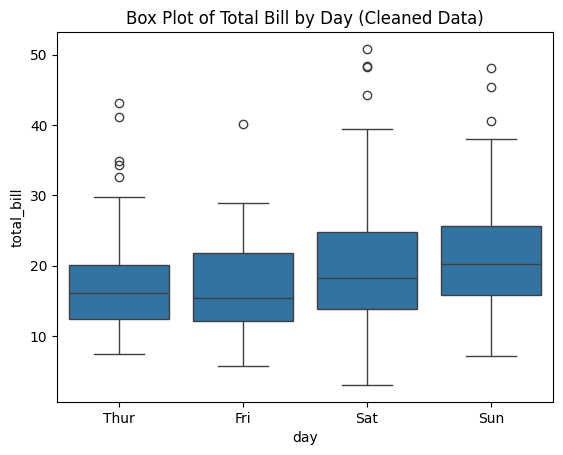

In [53]:
# Create a box plot of total_bill by day using the cleaned data
sns.boxplot(x="day", y="total_bill", data=cleaned_tips)
plt.title("Box Plot of Total Bill by Day (Cleaned Data)")

In [54]:
# Combining Pandas Operations with Seaborn Visualizations

In [57]:
avg_tips = tips.groupby(['day','time'],observed=False).agg({"tip":'mean'}).reset_index()

In [58]:
avg_tips

,day,time,tip
0,Thur,Lunch,2.767705
1,Thur,Dinner,3.000000
2,Fri,Lunch,2.382857
3,Fri,Dinner,2.940000
4,Sat,Lunch,NaN
5,Sat,Dinner,2.993103
6,Sun,Lunch,NaN
7,Sun,Dinner,3.263947


Text(0.5, 1.0, 'Average Tip by Day and Time')

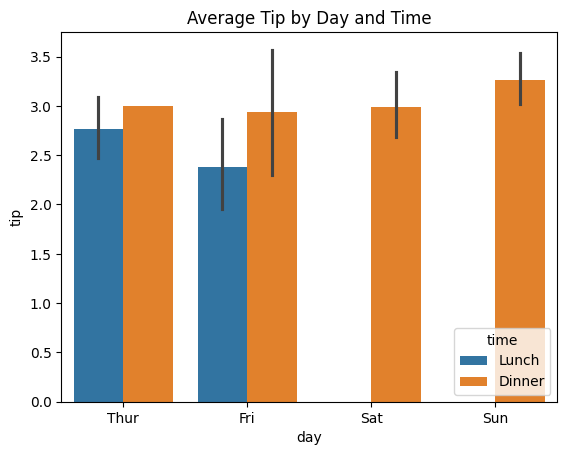

In [61]:
sns.barplot(x='day',y='tip',hue='time',data=tips)
plt.title("Average Tip by Day and Time")